### Import of custom libraries and classes

In [1]:
import sys

# This code can be ran locally or from Google Colab. Uncomment the following lines for data to be accessible from google drive/colab.
#from google.colab import drive 
#drive.mount('/content/drive', force_remount=True)
#sys.path.append('/content/drive/My Drive/Colab Notebooks/Projecte 1/classes')

sys.path.append('./classes') # If running locally

import pandas as pd

import persona as p
import recommendation as r

import filemanager
import makegraphs

from filmstats import filmmeans, mostseen, notseen, soulmates

### Data acquisition


Data is stored in a plan text `csv` format file, located at `./input/import.csv`. The first row contains the headers, and the first column the username. Each row will consist of the username and their rating for each film.

Reading the data is carried out by the `filemanager` module, using the `read_input_file()` function (that relies on the `pd.read_csv()` method in Pandas).

Example of the data stored in the csv file:


```
Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994)
MintbuzzMedius,4,2,4,3,5,0
Ineuntrain_99,3,2,5,5,1,5
```

In [2]:
df = filemanager.read_input_file()
#show on screen what has been done
df.head()

,Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
0,MintbuzzMedius,5,5,5,5,5,5,4,0,1,5,5,2,2,5,5,1
1,Frances_Gazebo,3,3,3,0,1,2,3,0,1,3,0,1,2,1,1,1
2,Realmdog16,4,2,4,5,1,2,0,3,2,4,5,1,2,0,5,5
3,Spoolmhorn,4,2,4,0,1,2,0,0,4,4,0,1,2,0,1,5
4,Ineuntrain_99,2,1,0,0,5,5,0,0,3,0,0,5,5,3,2,5


In [3]:
df.describe()

,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.617647,2.382353,1.882353,2.941176,3.205882,2.911765,2.588235,2.470588,2.911765,2.764706,2.735294,1.529412,2.470588,2.911765,2.117647,2.235294
std,1.775502,1.633266,1.532767,1.873923,2.085729,1.712125,1.559286,2.338548,1.896850,2.147004,1.911826,1.637354,2.018630,2.094258,2.026562,1.939366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.250000,0.000000,1.250000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.250000
50%,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,3.000000,4.000000,1.000000,2.000000
75%,4.000000,3.750000,3.000000,4.000000,5.000000,4.000000,3.750000,4.000000,4.000000,5.000000,5.000000,2.000000,4.000000,5.000000,4.750000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Data preparation


#### Creating data structures



##### `films` tuple
First of all, from the data obtained when importing the csv file, the list of films is stored in the `films` tuple:

In [4]:
#create tuple containing all films 
films = []
for col in df.columns: 
    films.append(col)
films = tuple(films [1:])
#show on screen what has been done 
print(films)

('The Godfather (1972)', 'Jurassic Park (1993)', 'Back to the Future (1985)', 'Indiana Jones and the Temple of Doom (1984)', 'E.T. the Extra-Terrestrial (1982)', 'Pulp Fiction (1994)', 'Jaws (1975)', 'Rocky (1976)', 'The Shawshank Redemption (1994)', 'Platoon (1986)', 'Braveheart (1995)', 'Forrest Gump (1994)', 'The Terminator (1984)', 'Taxi Driver (1976)', 'Scarface (1983)', 'Goodfellas (1990)')


##### `ratings` tuple
Next, a second tuple is created, `ratings`, containing the list of ratings for each film, preceded by the username:

In [5]:
#create tuple containing ratings for each person 
ratings = tuple(df.values.tolist())

#show on screen what has been done 
ratings_headers = list(films)
ratings_headers.insert(0,"Username")
pd.DataFrame(ratings, columns=ratings_headers).head(10)

,Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
0,MintbuzzMedius,5,5,5,5,5,5,4,0,1,5,5,2,2,5,5,1
1,Frances_Gazebo,3,3,3,0,1,2,3,0,1,3,0,1,2,1,1,1
2,Realmdog16,4,2,4,5,1,2,0,3,2,4,5,1,2,0,5,5
3,Spoolmhorn,4,2,4,0,1,2,0,0,4,4,0,1,2,0,1,5
4,Ineuntrain_99,2,1,0,0,5,5,0,0,3,0,0,5,5,3,2,5
5,Clathrose,3,2,0,1,5,2,3,0,1,0,1,5,3,0,4,5
6,DarkwrathDingy,1,2,3,5,0,1,2,3,0,3,5,0,3,0,3,0
7,Razzmatazz,4,2,0,4,0,2,1,4,5,0,4,5,5,1,5,0
8,Aquiform,3,4,1,1,5,1,2,3,4,0,2,1,5,5,1,5
9,ChevetYawp,4,0,3,2,5,4,3,4,0,4,3,0,1,1,1,1


##### `Persona` object list
At this point, a list to store the objects of the class `Persona` is created, containing the username, followed by the film ratings in diccionary form (with the film title as the key).

e.g. object `Persona` for user `Isonymmc814`, stored at `people[2]`:

```
    Isonymmc814: {'The Godfather (1972)': 0, 'Jurassic Park (1993)': 2, 'Back to the Future (1985)': 1, 'Indiana Jones and the Temple of Doom (1984)': 4, 'E.T. the Extra-Terrestrial (1982)': 5, ... }
```

In [6]:
# Create an object for each person, containing their name and a dictionary with the films and their ratings, and store in a list
people = []
for j in range(0,len(ratings)):
    a = p.Persona(ratings[j],films)
    people.append(a)

    # Show on screen what has been done 
    print(people[j])

MintbuzzMedius: {'The Godfather (1972)': 5, 'Jurassic Park (1993)': 5, 'Back to the Future (1985)': 5, 'Indiana Jones and the Temple of Doom (1984)': 5, 'E.T. the Extra-Terrestrial (1982)': 5, 'Pulp Fiction (1994)': 5, 'Jaws (1975)': 4, 'Rocky (1976)': 0, 'The Shawshank Redemption (1994)': 1, 'Platoon (1986)': 5, 'Braveheart (1995)': 5, 'Forrest Gump (1994)': 2, 'The Terminator (1984)': 2, 'Taxi Driver (1976)': 5, 'Scarface (1983)': 5, 'Goodfellas (1990)': 1}
Frances_Gazebo: {'The Godfather (1972)': 3, 'Jurassic Park (1993)': 3, 'Back to the Future (1985)': 3, 'Indiana Jones and the Temple of Doom (1984)': 0, 'E.T. the Extra-Terrestrial (1982)': 1, 'Pulp Fiction (1994)': 2, 'Jaws (1975)': 3, 'Rocky (1976)': 0, 'The Shawshank Redemption (1994)': 1, 'Platoon (1986)': 3, 'Braveheart (1995)': 0, 'Forrest Gump (1994)': 1, 'The Terminator (1984)': 2, 'Taxi Driver (1976)': 1, 'Scarface (1983)': 1, 'Goodfellas (1990)': 1}
Realmdog16: {'The Godfather (1972)': 4, 'Jurassic Park (1993)': 2, 'Back

#### Entering the target user and algorithm

At point, we will be asked to enter the username to which we want to obtain the recommendations. Once the username is entered, its `Persona` instance is searched within the `people[]` list.

Right after that, we will have the option to continue using Euclidian distance or Pearson correlation, two algorithms that can be used to calculate affinity between users.

In [7]:
target = input("Who do you want to get movie recommendations for?? (e.g. Udalna95\n")
#look up in existing Persona objects, if not present return error message and exit
###perhaps it would be better to prompt user for another entry###
found = False
for pers in range(0,len(people)):
  if target == people[pers].get_name():
    found = True
    break
if not found:
    print("Username not found.")
    sys.exit()

distancealgorithm = input("What comparison algorithm should be used? (Euclidean / Pearson)\n").lower() # Must be either "euclidean" or "pearson"
while distancealgorithm not in ["pearson", "euclidean"]:
  distancealgorithm = input("Non-valid algorithm. \'Euclidean\' o \'Pearson?\' ").lower()

print("Alright, let's search recommendations for", target, "with the",  distancealgorithm, "algorithm.")

Alright, let's search recommendations for Wonx with the pearson algorithm.


### Calculating the distance between users

To obtain the distance between two users, the class `Distancia` (distancia.py) is used. This class is defined as abstract (derives from the ABC metaclass), and therefore objects cannot be created from it. Moreover, it includes the abstract method `.Dist()` which is implemented in the subclasses `DistanciaEuclidiana` and `DistanciaPearson`, which inherit from it.

This abstract method `.Dist()` receives the two usernames to compare as two instances of the `Persona` object, and the distance algorithm we want to use (`euclidean` or `pearson`).

The method uses internally the already existing `ratings` tuple, (and later assigned to the `Persona` object, accessible through the `.get_ratings()` method), to compare the series of ratings between two users.

e.g. comparing the users `Ineutrain_99` and `Peripatetic`.
```
[3, 2, 5, 3, 3, 5]
[4, 2, 4, 3, 5, 0]
```
A `0` value in a rating indicate that a movie has not been yet rated by that user. Therefore, that rating pair will be ignored when the comparisons are performed.

The distance can be calculated using the Pearson correlation or the Euclidean distance:

#### Pearson correlation
The result will be a value between -1 and 1. A higher value indicates a higher affinity between users. The calculation is done through the `np.corrcoef()` from the *NumPy* library. 

*(Note: due to limitations in the algorithm, the distance cannot be computed if there are less than 4 rating pairs, or if all the ratings for a user are the same one (e.g. `[4, 4, 4, 4, 4, 4]`).* 

#### Euclidean distance
The result will be a value between 0 and 4 (the difference in the rating range, where people can vote from 1 to 5). Broadly speaking, since it is a unidimensional variable, the distance for each rating pair is calculated with the `np.sqrt(np.sum((p[i]-q[i])**2))` formula and these values are then averaged (with the help of `np.nanmean(distance)`.



In [8]:
### The code containing the distance calculation is executed when the
### classification table is created

### Classification table

The attribute `classification_table` from the object `Persona` (here instantiated as an element of the `people[k]` list) is a list of dictionaries. It's a table where the rest of the users ("critics") appear, each one with the distance, their rating for each film, and the corrected rating for each film (inicated wi the `_corrected` suffix). This table will be unique for each user, since the corrected ratings are personalized.

To obtain the corrected rating, we multiply the user's rating with the affinity degree.

For example:


> The user `Hippedrikp` rated `Taxi Driver (1976)` with a `5` out of 5, and the affinity (distance) with the selected username is `0.64`, therefore, the corrected rating will be `3.18`).

The table would look like this:

```
Critic          Distance               Taxi Driver (1976)         Taxi Driver (1976)_corrected
Hippedrikp      0.64                   5                          3.18
Ketperhd        0.80                   1                          0.80
Placidre1022    0.67                   5                          3.33
.
.
.
```

We can display the table by using the method `.get_classificationtable(title)`, where the `title` argument will only show the scores for a specific film. Instead, `all` can be used to show the whole table (as a pandas table) or `raw` to list it directly through python. *(uncomment el `input()` line to make it interactive)*.

**Note: Furthermore, there's a second correction, by popularity, that is is applied only when the recommendations are generated (explained in its own section).*

In [9]:
# Search for the specified person ('target')
for k in range(0,len(people)):
  if people[k].get_name() == target:
    # We generate the classification table for that user.
    people[k].classification_table = r.Recommendation.classificationtable(people[k], people, films, distancealgorithm)
    break

# Display the classification table, complete or just for one specific film
#title = input("Show classification table for film (<title> [e.g. \"Jaws (1975)\"] / all / raw): ")
title = "Jaws (1975)"
people[k].get_classificationtable(title)



Generating the classification table for Wonx ...
...done.

Classification table of Jaws (1975) for Wonx


,Critic,Affinity,Jaws (1975),Jaws (1975)_corrected
32,Meirin,0.94,3,2.82
21,Ollamhnfish,0.87,3,2.61
10,Placidre1022,0.74,3,2.21
13,Moduloman0710,0.71,2,1.42
19,Udalna95,0.70,0,0.00
5,Clathrose,0.67,3,2.00
20,Peripatetic,0.66,3,1.99
16,Quadratrix,0.63,2,1.26
8,Aquiform,0.62,2,1.25
17,Isonymmc814,0.62,2,1.23


#### Affinity with the rest of the users


Affinity table for Wonx


,Critic,Affinity
32,Meirin,0.94
21,Ollamhnfish,0.87
10,Placidre1022,0.74
13,Moduloman0710,0.71
19,Udalna95,0.70
5,Clathrose,0.67
20,Peripatetic,0.66
16,Quadratrix,0.63
8,Aquiform,0.62
17,Isonymmc814,0.62


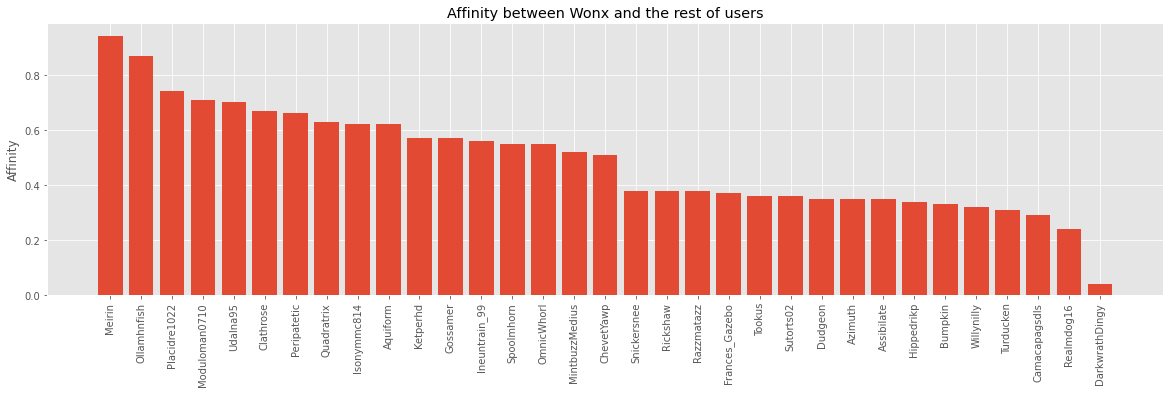

In [21]:
# The method .get_affinity() shows only the distance (affinity) of the selected user with the rest.
people[k].get_affinity()

# Generates a graph bar with the affinities with the other users
makegraphs.intermediate_graphs(target, people[k].classification_table)

### Film statistics


El mòdul `filmstats.py` ens permet visualitzar algunes estadístiques dels films, tot i que aquestes funcions s'utilitzen internament en altres funcions i mètodes.

Per exemple, tenim la funció `mostseen()` que ens mostra les pel·lícules més vistes.

In [20]:
print("Most popular films:")
mesvistos = mostseen(people, films)
films_mostpopular = []
films_mostpopular_headers = ["Title", "seen by", "% of users"]
for film in sorted(mesvistos.items(), key=lambda x:x[1], reverse=True):
  films_mostpopular.append([film[0], str(film[1])+"/"+str(len(people)), str(round(film[1]/len(people)*100,2))])

display(pd.DataFrame(films_mostpopular, columns=films_mostpopular_headers))

Most popular films:


,Title,seen by,% of users
0,Pulp Fiction (1994),31/34,91.18
1,The Godfather (1972),29/34,85.29
2,Jaws (1975),29/34,85.29
3,Jurassic Park (1993),28/34,82.35
4,E.T. the Extra-Terrestrial (1982),28/34,82.35
5,The Shawshank Redemption (1994),28/34,82.35
6,Braveheart (1995),28/34,82.35
7,Indiana Jones and the Temple of Doom (1984),27/34,79.41
8,Taxi Driver (1976),27/34,79.41
9,Goodfellas (1990),25/34,73.53


### Generació de recomanacions
A continuació, fem ús de la classe `Recommendation` al mòdul `recommendation`.



Aquesta classe, a la que li indiquem la persona de referència, la llista d'objectes persona i el llindar mínim de puntuació a recomanar, ens crearà un objecte (emmagatzemat a `c`) contenint les recomanacions, i accessibles mitjançant el mètode `.get_recommendation()`, que ens retornarà un diccionari amb el títol del film com a clau, i la seva puntuació corregida per al usuari com a valor.

Internament, es miren quins films no ha vist l'usuari (funció `notseen()`), i a partir de la mitjana de les puntuacions corregides de cada usuari (funció `filmmeans()` per aquests films, s'aplica una última correcció per popularitat (multiplicant el ratio de visionat de cada film (`mostseen()`) i es mira si la pel·lícula supera el llindar de puntuació que hem indicat.

Exemple:

> Ens posem un llindar de `1.5` (sobre un màxim teòric de 5). `notseen()` ens indica que `Paula` no ha vist `Back to the Future` ni `Pulp Fiction`. `Back to the Future` té una puntuació corregida de `1.76` (ho veiem de la seva `classification_table`), i com és una pel·lícula que han vist el `86.7%` dels usuaris, la correcció per popularitat queda en `1.53`. Com supera el llindar de `1.5`, li recomanem aquesta pel·lícula. No obstant, `Pulp Fiction` resulta en una puntuació corregida per popularitat de `1.45`, per tant no se li recomanarà.

In [12]:
# Create object recommendation and make recommendations based on distance. 
# The fouth parameter is the minimum popularity-corrected rating for our recommendations. Higher number will yield fewer results
c = r.Recommendation(people[k],people,films,0.62)

#print("\n\nRecomanació:", c.get_recommendation()) # non-sorted dict with title as key and corrected rating as value
print("\n\nRecommendations for", people[k].get_name(),":")
index = 0
film_recommendations = []
film_recommendations_headers = ["Rank", "Title", "Rating (popularity-corrected)"] 
for film in sorted(c.get_recommendation().items(), key=lambda x:x[1], reverse=True):
  index += 1
  #print(str(index)+". "+film[0]+": \t"+str(film[1]))
  film_recommendations.append([str(index), film[0], str(film[1])])
display(pd.DataFrame(film_recommendations, columns=film_recommendations_headers))


Recommendation module:
  Wonx has not seen ['Indiana Jones and the Temple of Doom (1984)', 'Rocky (1976)', 'Platoon (1986)', 'Forrest Gump (1994)', 'The Terminator (1984)', 'Scarface (1983)', 'Goodfellas (1990)']
  Indiana Jones and the Temple of Doom (1984) Popularity:  79.4 %
  Indiana Jones and the Temple of Doom (1984) Corrected: 1.35 ; Corrected by popularity: 1.07
  Rocky (1976) Popularity:  58.8 %
  Rocky (1976) Corrected: 1.11 ; Corrected by popularity: 0.65
  Platoon (1986) Popularity:  70.6 %
  Platoon (1986) Corrected: 1.19 ; Corrected by popularity: 0.84
  Forrest Gump (1994) Popularity:  64.7 %
  Forrest Gump (1994) Corrected: 0.75 ; Corrected by popularity: 0.49
  The Terminator (1984) Popularity:  67.6 %
  The Terminator (1984) Corrected: 1.11 ; Corrected by popularity: 0.75
  Scarface (1983) Popularity:  70.6 %
  Scarface (1983) Corrected: 1.07 ; Corrected by popularity: 0.76
  Goodfellas (1990) Popularity:  73.5 %
  Goodfellas (1990) Corrected: 1.09 ; Corrected by pop

,Rank,Title,Rating (popularity-corrected)
0,1,Indiana Jones and the Temple of Doom (1984),1.07
1,2,Platoon (1986),0.84
2,3,Goodfellas (1990),0.8
3,4,Scarface (1983),0.76
4,5,The Terminator (1984),0.75
5,6,Rocky (1976),0.65


### Emmagatzematge de recomanacions
Per tal d'emmagatzemar les recomanacions es genera un fitxer dins la carpeta `output/` que s'anomena `Recomanació.txt`. En aquest fitxer es va afegint una línia amb el nom de la persona a qui es recomana la pel·lícula i el títol de la pel·lícula per cada execució del programa. 

Addicionalment, es genera un fitxer en format `csv`amb el nom de la persona a qui es recomana la pel·lícula i el sufix "_recommendations" dins la carpeta `output/detailed recommendations` en el quan s'inclouen totes les pel·lícules que la persona no ha vist i les puntuacions relatives a les mateixes.

In [13]:
#store recommended film
if bool(c.get_recommendation()):
  filemanager.store_recommended_film(target, c.get_recommendation())
  filemanager.store_personalized_films(target, c.get_recommendation())
else:
  print("Couldn't recommend any films to this user.")
  print("Either they have seen all of them, or the system does not believe they would enjoy any of the non-watched ones.")

File ./output/recommendations.txt updated with recommendations for Wonx
./output/detailed recommendations/Wonx_recommendations.csv file created


### Altres gràfics
Generem una sèrie de gràfics amb l'ajuda de la biblioteca `Matplotlib`. Per exemple, les puntuacions corregides de les pel·lícules no vistes, l'afinitat amb altres persones, els histogrames de puntuació de cada pel·lícula recomanada, la puntuació mitjana per pel·lícula, i la distribució de puntuacions per usuari i pel·lícula.

#### Recomanacions de pel·lícules no vistes

(gràfic de barres amb les pel·lícules no vistes i les seves puntuacions corregides)


                                                0
Rocky (1976)                                 0.65
The Terminator (1984)                        0.75
Scarface (1983)                              0.76
Goodfellas (1990)                            0.80
Platoon (1986)                               0.84
Indiana Jones and the Temple of Doom (1984)  1.07


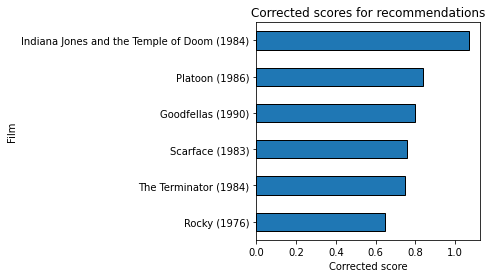

In [14]:
if bool(c.get_recommendation()):
  makegraphs.recommendations_graph(c.get_recommendation())

#### Voting histogram for recommended films

{'Indiana Jones and the Temple of Doom (1984)': 1.07, 'Rocky (1976)': 0.65, 'Platoon (1986)': 0.84, 'The Terminator (1984)': 0.75, 'Scarface (1983)': 0.76, 'Goodfellas (1990)': 0.8}
Indiana Jones and the Temple of Doom (1984)
1     2
2     3
3     4
4    10
5     8
dtype: int64


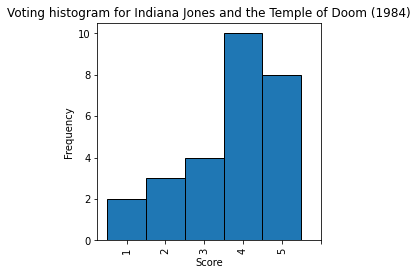

Rocky (1976)
1    0
2    0
3    0
4    0
5    5
9    1
dtype: int64


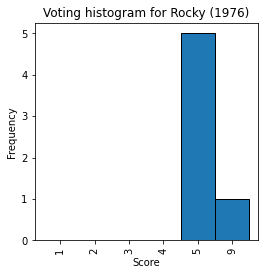

Platoon (1986)
1     3
2     1
3     2
4     7
5    11
dtype: int64


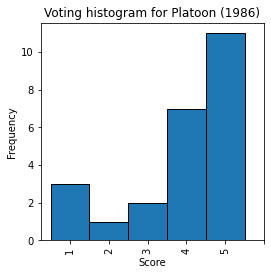

The Terminator (1984)
1    1
2    4
3    5
4    5
5    8
dtype: int64


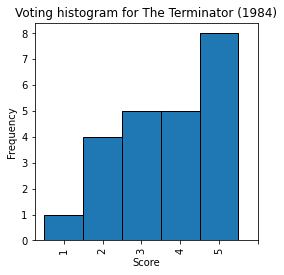

Scarface (1983)
1    8
2    3
3    3
4    1
5    9
dtype: int64


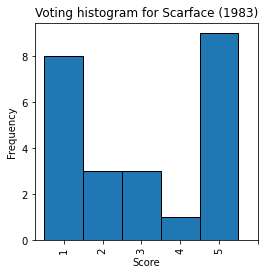

Goodfellas (1990)
1    6
2    6
3    1
4    5
5    7
dtype: int64


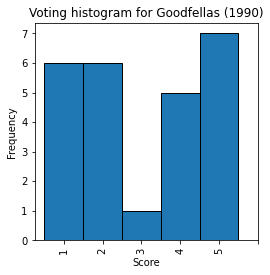

In [15]:
if bool(c.get_recommendation()):
  makegraphs.rating_histogram(c.get_recommendation(), people[k].classification_table)

#### User affinity heatmap


Generating the classification table for MintbuzzMedius ...
...done.
            Critic
0   Frances_Gazebo
1       Realmdog16
2       Spoolmhorn
3    Ineuntrain_99
4        Clathrose
5   DarkwrathDingy
6       Razzmatazz
7         Aquiform
8       ChevetYawp
9     Placidre1022
10        Ketperhd
11        Gossamer
12   Moduloman0710
13       Turducken
14      OmnicWhorl
15      Quadratrix
16     Isonymmc814
17   Camacapagsdls
18        Udalna95
19     Peripatetic
20     Ollamhnfish
21       Sutorts02
22         Bumpkin
23         Azimuth
24      Hippedrikp
25        Rickshaw
26      Willynilly
27      Assibilate
28          Tookus
29         Dudgeon
30     Snickersnee
31          Meirin
32            Wonx

Generating the classification table for MintbuzzMedius ...
...done.

Generating the classification table for Frances_Gazebo ...
...done.

Generating the classification table for Realmdog16 ...
...done.

Generating the classification table for Spoolmhorn ...
...done.

Generating the c

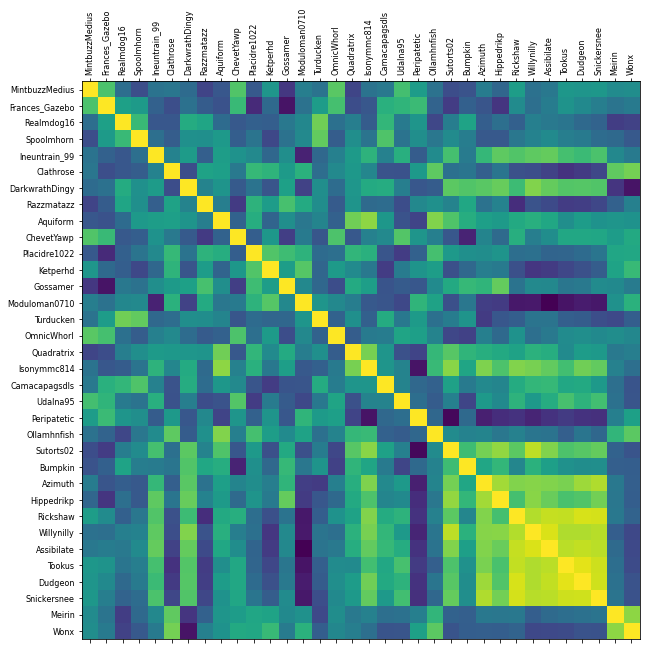

In [16]:
# User affinity heatmap
makegraphs.affinity_heatmap(people, films, distancealgorithm)

#### Distribució de puntuacions del film més recomanat

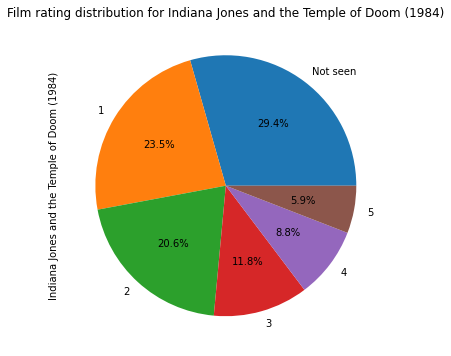

In [17]:
# Pie chart for rating distribution for the highest recommended film
if bool(c.get_recommendation()):
  makegraphs.output_graphs(df,max(c.get_recommendation(), key=c.get_recommendation().get))

#### Altres gràfics

/home/marc/Nextcloud/PersonalMarc/git repository/film-recommender-system/./classes/makegraphs.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().sort_values(ascending=False).plot(kind='bar')


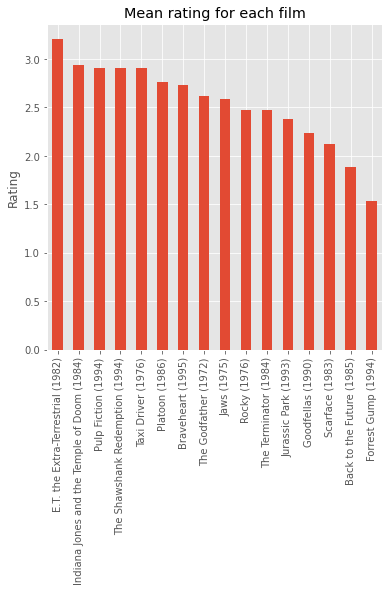

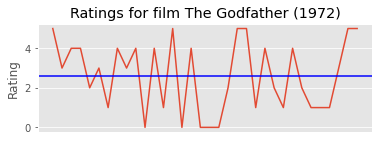

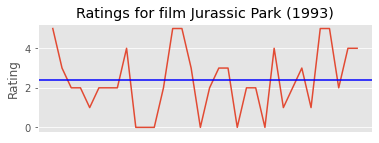

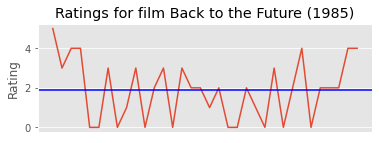

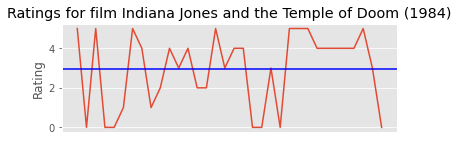

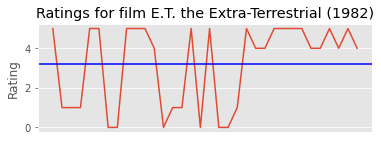

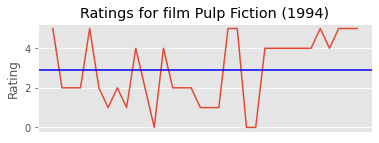

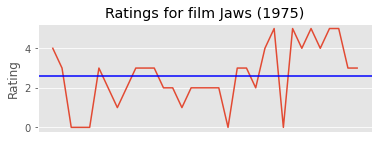

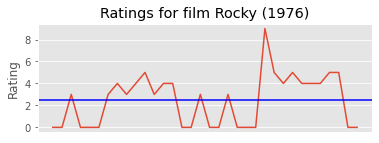

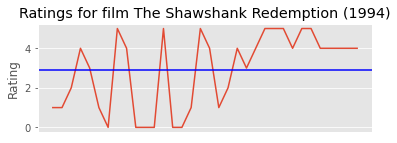

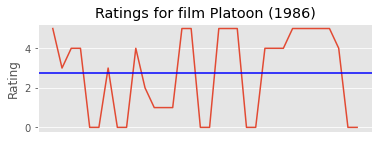

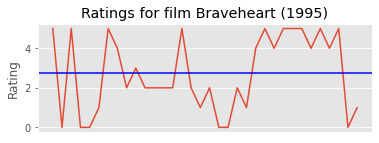

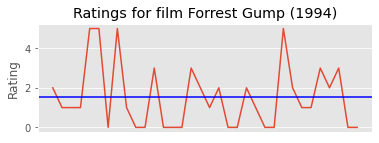

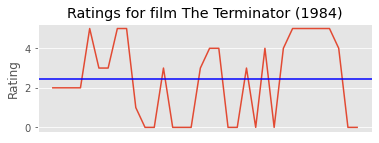

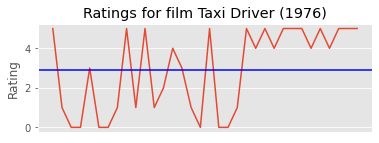

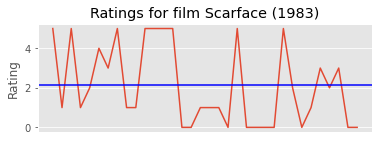

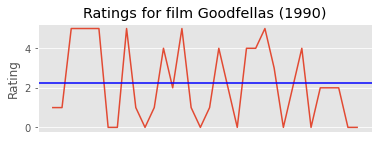

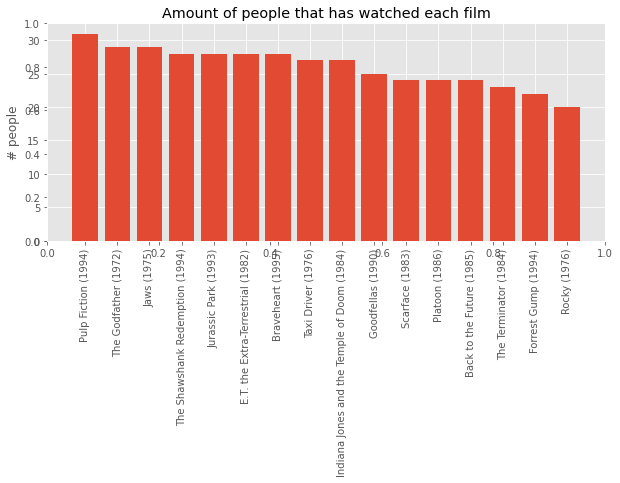

In [18]:
# Plots for mean score for each film, score distributions among users, and most popular films
makegraphs.input_graphs(df)

### Mòduls, classes i mètodes utilitzats

#### `recommendation.py`
Inclou la classe `Recommendation`, i dins d'ella, el mètode `classificationtable()`, que genera la taula de classificació per als objectes `Persona`, mitjançant la invocació dels mètodes de càlcul de distància del mòdul `distancia.py`.

En el constructor d'aquesta classe, es calculen les recomanacions pels films no vistos per l'usuari en qüestió.

#### `distancia.py`

Composat per la classe abstracta ` Distancia(ABC):`, amb les subclasses `DistanciaEuclidiana(Distancia)` i `DistanciaPearson(Distancia)`, que s'encarreguen de calcular la distància entre usuaris amb els dos algorismes respectivament. A més, conté el mètode `newrange()` per a adaptar els rangs de puntuació.

#### `persona.py`
Aquest mòdul conté la classe `Persona`, responsable per a crear els objectes persona que emmagatzemen totes les dades de l'usuari, des del seu nom, puntuacions, i la pròpia taula de classificacions.

A més, inclou mètodes per a retornar aquesta informació de manera ordenada.

#### `filemanager.py`
Es un mòdul que incorpora les funcions `read_input_file()`,  `store_recommended_film()`, `store_personalized_films()`, per a llegir l'origen de dades, desar les recomanacions en un fitxer general, o particular per a cada usuari (en `csv`), respectivament.

#### `filmstats.py`
Mòdul que conté un conjunt de funcions per a extreure dades estadístiques dels films. Per exemple, `filmmeans(person)` proporciona les puntuacions mitjanes de cada pel·lícula; `mostseen()` mostra les pel·lícules més vistes; `notseen(person)` mostra les pel·lícules no vistes per un usuari; i `soulmates(persona)` retorna aquelles persones amb qui l'usuari té més afinitat. 

#### `makegraphs.py`
És un mòdul que incorpora les funcions `input_graphs()`, `intermediate_graphs() `, `output_graphs()`, `recommendations_graph()` i `rating_histogram()` amb l'objectiu de generar diversos tipus de gràfics a partir de les dades processades.

### Ús de biblioteques Pandas, NumPy i Matplotlib

#### Pandas
Ha estat utilitzada en diverses ocasions, des de la creació de Dataframes per a mostrar la taula de classificació de manera interactiva, a preparar les dades a mostrar en els gràfics, al realitzar calculs estadístics, com en el moment de llegir la informació d'origen en format csv.

#### NumPy
Ha estat utilitzat principalment durant el càlcul de les distàncies euclidiana i correlació de pearson, respectivament, així com amb la gestió de valors nuls.

#### Matplotlib
Utilitzat extensivament per a la elaboració dels gràfics resum de les dades obtingudes per a cada persona.